In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from polynomial import PolynomialFeature
from utils import rmse
from linear_regression import LinearRegression
from Sigmoid import SigmoidalFeature
from Gaussian import GaussianFeature
%matplotlib inline

In [2]:
df_X= pd.read_csv('dataset/data_X.csv')

In [3]:
# GRE score, TOFEL score, University rating, SOP, LOR, CGPA, Research as the input
input = ['GRE_score', 'TOFEL_score', 'University_rating', 'SOP', 'LOR ', 'CGPA', 'Research']
print(df_X.shape)
df_X[input][0:10]

(500, 8)


,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [4]:
df_Y= pd.read_csv('dataset/data_T.csv')

ans = ['Chance_of_Admit ']
print(df_Y.shape)
df_Y[ans][0:10]

(500, 2)


,Chance_of_Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
5,0.90
6,0.75
7,0.68
8,0.50
9,0.45


In [5]:
df_X['Chance_of_Admit '] = df_Y[ans]
msk = np.random.rand(len(df_X)) < 0.8
train = df_X[msk]
test = df_X[~msk]

In [6]:
X_train = train[input].to_numpy()
X_test = test[input].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

# 2.1.a

## M=2

In [7]:
feature = PolynomialFeature(2)

X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

In [8]:
y_pred = model.predict(X_test)

In [9]:
list_x = np.linspace(0, 1, test.shape[0])

In [10]:
y_test.shape

(99, 1)

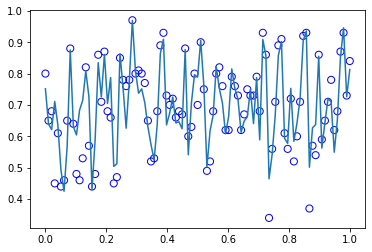

In [11]:
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

In [13]:
print('Polynomial rms error result:', rmse(y_test, y_pred))

Polynomial rms error result: 0.0656538993375637


## M=1

In [14]:
X_train = train[input].to_numpy()
X_test = test[input].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

In [15]:
feature = PolynomialFeature(1)

X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

In [16]:
y_pred = model.predict(X_test)

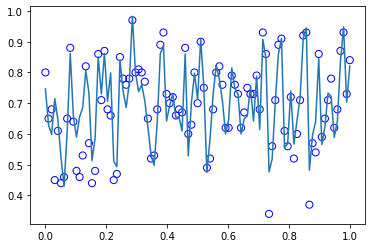

In [17]:
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

In [18]:
print('rmse result:', rmse(y_test, y_pred))

rmse result: 0.062086676958373485


## 2.1.a result
Look like M=2 is better than M=1, because more degree can fit more data but when degree bigger which will happen overfitting

# 2.1.b

In my observation, I found CGPA is the best contributive feature, I use pearson corrleation to calcuate seven columns, 
```
{'GRE_score': 1.0884036862476284e-117,
 'TOFEL_score': 6.729926762328514e-109,
 'University_rating': 5.866255627650183e-72,
 'SOP': 2.8859074534541132e-70,
 'LOR ': 3.069932320299405e-60,
 'CGPA': 3.396544858710999e-165,
 'Research': 3.595493545839702e-40}
```

The smaller the value, the stronger the correlation, Research is the stronger correlateion. However, Research is bool value that is hard to fit continuous value so we choose CGPA.

In another observate we can find:

In [19]:
df_X[0:2]

,Serial_id,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


0 and 1 have the same eigenvalues, except for CGPA, but the results are very different.

That see another example:

In [20]:
df_X[5:7]

,Serial_id,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75


We can draw the plot show CGPA and score

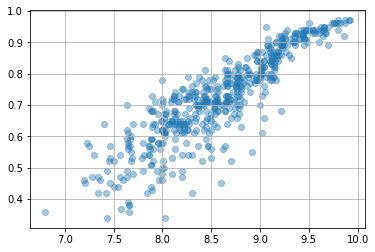

In [21]:
plt.scatter(df_X['CGPA'],df_X['Chance_of_Admit '],  
            alpha = 0.4, cmap = 'Reds')
plt.grid()

In this figure you can see CGPA(X) is proportional to chance_of_admint(Y).

In [22]:
X_train = train['CGPA'].to_numpy()
X_test = test['CGPA'].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

In [23]:
feature = PolynomialFeature(1)

X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

In [24]:
y_pred = model.predict(X_test)

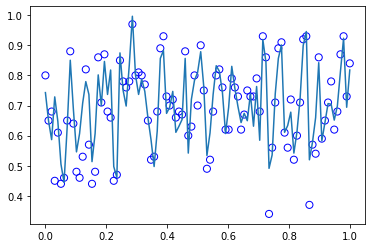

In [25]:
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

In [26]:
print('polynomial Feature rmse result:', rmse(y_test, y_pred))

polynomial Feature rmse result: 0.0667886149072082


## Other test
We can use only research to be feature

polynomial Feature rmse result: 0.1292704887740991


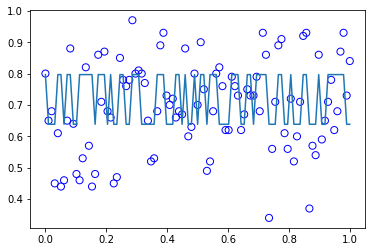

In [28]:
X_train = train['Research'].to_numpy()
X_test = test['Research'].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

feature = PolynomialFeature(1)

X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

print('polynomial Feature rmse result:', rmse(y_test, y_pred))

Look like the model can't fit data with ```Research``` feature

# 2.1.b result

However rms error is higher than pervious, but we just use one feature can get this performance

this result is prove CGPA is most contributive feature.

# 2.2.a result
I think polynomial could be best basisi function. I refer this, I think polynomial can fit most data
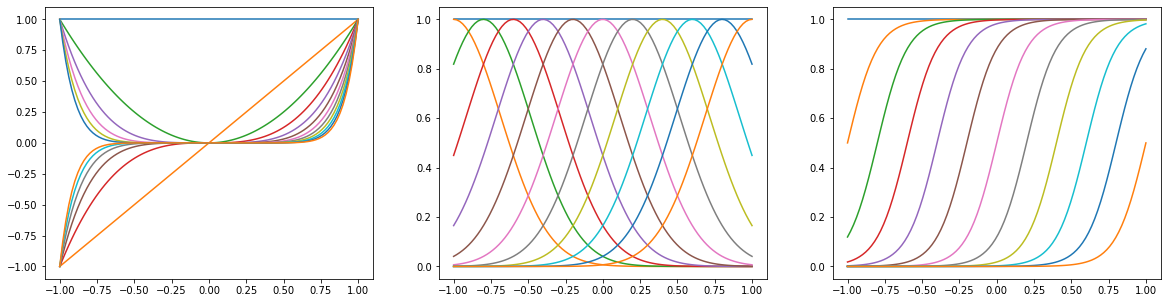

# 2.2.b
Let's do some experiment, pervious we have try polynomial so let try gaussian, sigmoid, tanh 

In [29]:
X_train = train[input].to_numpy()
X_test = test[input].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

In [30]:
list_x = np.linspace(0, 1, test.shape[0])

In [31]:
X_test.shape

(99, 7)

In [32]:
feature  = GaussianFeature(7)
feature.fit(X_train)
X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

In [33]:
X_test.shape

(99, 7)

In [34]:
y_pred = model.predict(X_test)

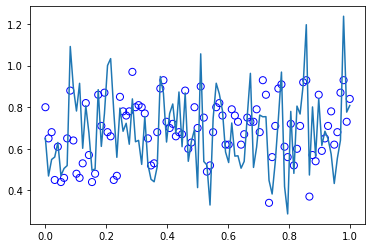

In [35]:
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

In [38]:
print('Gaussian rms error result:', rmse(y_test, y_pred))

Gaussian rms error result: 0.15545616202249793


In [39]:
X_train = train[input].to_numpy()
X_test = test[input].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

In [40]:
feature  = SigmoidalFeature(7)
feature.fit(X_train)
X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)


In [41]:
y_pred = model.predict(X_test)

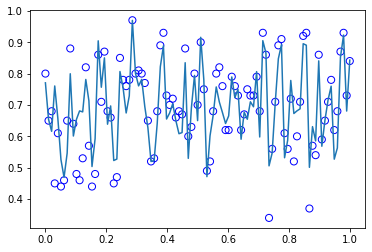

In [42]:
list_x = np.linspace(0, 1, test.shape[0])
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

In [43]:
print('Sigmoid rmse result:', rmse(y_test, y_pred))

Sigmoid rmse result: 0.07239250764540214


In [44]:
X_train = train[input].to_numpy()
X_test = test[input].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

In [45]:
X_train = np.tanh(X_train)
X_test = np.tanh(X_test)

model = LinearRegression()
model.fit(X_train, y_train)


In [46]:
y_pred = model.predict(X_test)

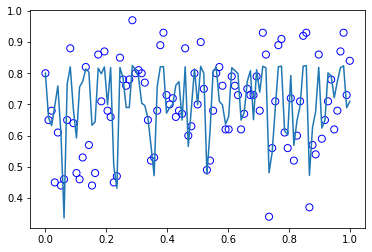

In [47]:
list_x = np.linspace(0, 1, test.shape[0])
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

In [49]:
print('Tanh rmse result:', rmse(y_test, y_pred))

Tanh rmse result: 0.09152101664652866


# 2.2.b result
In this experiment we compare three basis function. polynomial can get best performance.

# 2.2.c
Holdout CV is pick p data in train data and use 1-p be testing data that will iterate 3 times.

In this experiment we will try to find the N parameters

In [56]:
from statistics import mean 

def Holdout(X, start, end):
    '''
    This function is find polynomial parameters N, and use RMS error to estmate
    '''
    res = {}
    for i in range(start, end+1):
        rms_temp = []
        for j in range(0, 3):
            # split cv_train and cv_test by train data
            msk2 = np.random.rand(len(X)) < 0.9
            CV_train = X[msk2]
            CV_test = X[~msk2]
            # train
            CV_X_train = CV_train[input].to_numpy()
            CV_y_train = CV_train[ans].to_numpy()
            # test
            CV_X_test = CV_test[input].to_numpy()
            CV_y_test = CV_test[ans].to_numpy()
            # declare feature
            feature = PolynomialFeature(i)
            # transform
            CV_X_train = feature.transform(CV_X_train)
            CV_X_test = feature.transform(CV_X_test)

            model = LinearRegression()
            model.fit(CV_X_train, CV_y_train)

            CV_y_pred = model.predict(CV_X_test)
            # RMS Error
            rms = rmse(CV_y_test, CV_y_pred)
            rms_temp.append(rms)
        
        res[i] = mean(rms_temp)
    return res

In [57]:
res = Holdout(train,1,5)
res

{1: 0.05850296441520499,
 2: 0.0695992354161088,
 3: 0.08965962070352439,
 4: 0.5308588402498018,
 5: 2.881836941758177}

## 2.2.c result
This is cross-vaild result search polynomial parameters
```
1 : 0.04270476562926714
2 : 0.06555475019905845
3 : 0.08543749467728087
4 : 0.32243312339639363
5 : 3.1559863318935375
```
Look like N=1 is the best parameters

# 2.3.a